# **Detection of Breast Cancer**

The dataset available at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data is known as the Wisconsin Breast Cancer Diagnostic dataset. It was originally created by Dr. William H. Wolberg, physician at the University of Wisconsin Hospital in Madison, Wisconsin, and it was donated to the UCI Machine Learning Repository in 1992.

The dataset contains 699 instances of breast cancer patients' clinical data, which were collected during January 1989 to November 1991 at the University of Wisconsin Hospitals. The dataset includes the following 11 attributes:

1. Sample code number: id number

2. Clump Thickness: 1 - 10

3. Uniformity of Cell Size: 1 - 10

4. Uniformity of Cell Shape: 1 - 10

5. Marginal Adhesion: 1 - 10

6. Single Epithelial Cell Size: 1 - 10

7. Bare Nuclei: 1 - 10

8. Bland Chromatin: 1 - 10

9. Normal Nucleoli: 1 - 10

10. Mitoses: 1 - 10

11. Class: (2 for benign, 4 for malignant)

The first attribute is a unique identifier for each instance, and the remaining ten attributes are numerical features that describe different properties of cell nuclei in the breast tissue samples. The last attribute, "Class", is the target variable that indicates whether the sample is benign or malignant.

### **Project Statement**

The goal is to develop a predictive model that can accurately classify breast tissue samples as either benign or malignant based on the
ir cell nuclei features. This can be useful in assisting medical professionals in the diagnosis of breast cancer and in identifying cases that require further investigation or treatment.

Machine learning models trained on this dataset can be used to predict the likelihood of a breast tissue sample being malignant or benign based on the values of the cell nuclei features. Such models can be used in clinical settings to aid in the diagnosis of breast cancer, potentially helping medical professionals make more accurate diagnoses and reducing the number of unnecessary biopsies.

Additionally, developing accurate models for predicting breast cancer diagnosis can lead to better understanding of the underlying relationships between the cell nuclei features and the likelihood of malignant tumors. This, in turn, can lead to improved understanding of the mechanisms of breast cancer development and progression, and may aid in the development of new diagnostic and treatment methods.

In [ ]:
import numpy as np
import pandas as pd
import sys

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## **1. Read in the dataset from the source file and clean the data**



In [ ]:
import pandas as pd

# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

# Preprocess the data
df.replace('?', -99999, inplace=True)  # Replace missing values with -99999
df.drop('id', axis=1, inplace=True)    # Drop the 'id' column

# Print information about the dataset
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")
print(f"Number of missing values: {df.isin([-99999]).sum().sum()}")

Shape of the dataset: (699, 10)
Columns in the dataset: Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')
Number of missing values: 16


# **2. Exploratory data analysis**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset and do some visualizations
print("Sample record:")
print(df.iloc[10])  # Using iloc instead of loc for integer-based indexing

# Print the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Summarize the dataset
print("Summary statistics:")
print(df.describe())



Sample record:
clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
Shape of the dataset: (699, 10)
Summary statistics:
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial

In [ ]:
# Define a function to calculate the correlation of each feature with the target variable
def calc_feature_corr(data, target_col):
    corr_df = data.corr()[[target_col]].sort_values(by=target_col, ascending=False)
    return corr_df

# Call the function to calculate the correlation of each feature with the target variable
corr_df = calc_feature_corr(df, 'class')
print(corr_df)

                           class
class                   1.000000
uniform_cell_shape      0.818934
uniform_cell_size       0.817904
bland_chromatin         0.756616
clump_thickness         0.716001
normal_nucleoli         0.712244
marginal_adhesion       0.696800
single_epithelial_size  0.682785
mitoses                 0.423170


# **3. Visualizations**

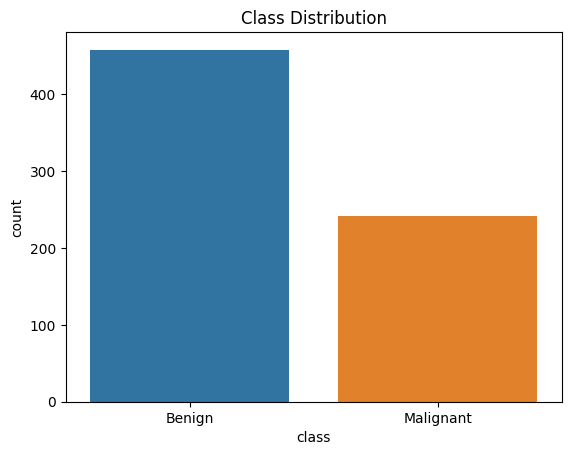

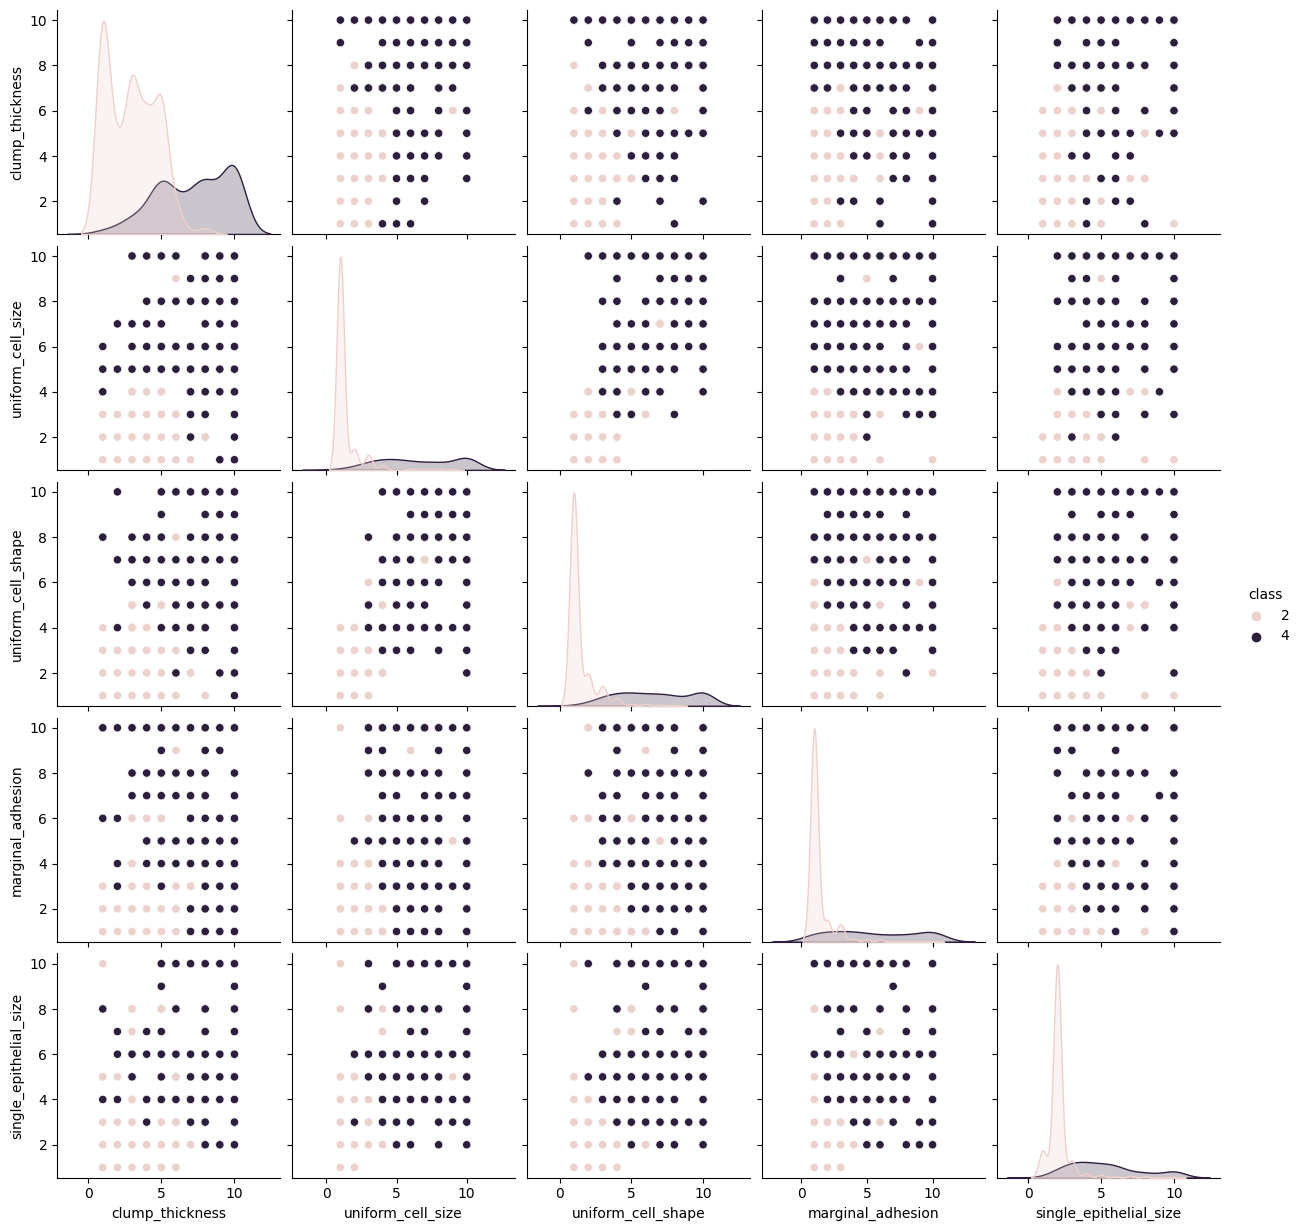

In [ ]:
# Visualize the class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

# Visualize the pairwise relationships between the some features
# the vars list in the sns.pairplot() function, only kept the 5 important features in the pairplot visualization.
sns.pairplot(df, hue='class', vars=['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size'])
plt.show()


# **4. Traning**

In [ ]:
from sklearn.model_selection import train_test_split

# Create X and Y datasets for training
X = df.drop('class', axis=1).values  # Using .values to convert the dataframe to a numpy array
y = df['class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adding a random state for reproducibility


KNN: 0.961 (0.025)
SVM: 0.649 (0.066)


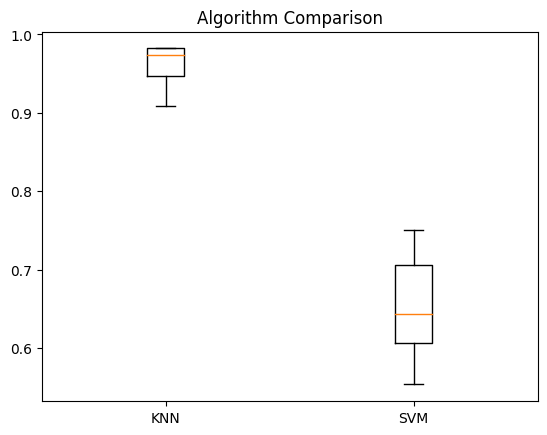

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define models to train
models = [('KNN', KNeighborsClassifier(n_neighbors=5)),
          ('SVM', SVC())]

# Evaluate each model in turn using cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

# Boxplot to compare the algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# **5. Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: accuracy = {acc:.3f}")
    print(classification_report(y_test, y_pred))


KNN: accuracy = 0.986
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM: accuracy = 0.679
              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **6. Performance of the Models**

KNN best hyperparameters: {'knn__n_neighbors': 11}
KNN CV score: 0.9606493506493505
SVM best hyperparameters: {'svm__C': 1, 'svm__gamma': 0.1}
SVM CV score: 0.9552922077922077
KNN: 0.964 (0.016)
SVM: 0.961 (0.016)
Random Forest: 0.962 (0.019)
Decision Tree: 0.946 (0.024)
Gradient Boosting: 0.953 (0.022)


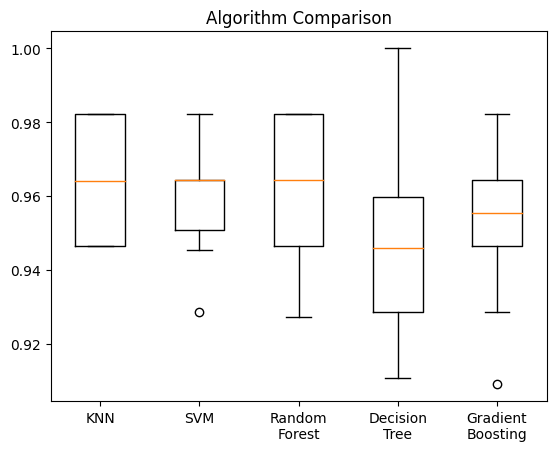

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define pipelines for KNN and SVM with feature scaling
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# Define a grid of hyperparameters to search over
knn_params = {'knn__n_neighbors': [3, 5, 7, 9, 11]}
svm_params = {'svm__C': [0.1, 1, 10, 100], 'svm__gamma': [0.1, 1, 10, 100]}

# Perform grid search to find the best hyperparameters for KNN and SVM
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, scoring='accuracy')
svm_grid = GridSearchCV(svm_pipe, svm_params, cv=10, scoring='accuracy')

knn_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("KNN best hyperparameters:", knn_grid.best_params_)
print("KNN CV score:", knn_grid.best_score_)
print("SVM best hyperparameters:", svm_grid.best_params_)
print("SVM CV score:", svm_grid.best_score_)

# Compare the performance of KNN, SVM, random forest, decision tree, and gradient boosting
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

models = [('KNN', KNeighborsClassifier(n_neighbors=knn_grid.best_params_['knn__n_neighbors'])),
          ('SVM', SVC(C=svm_grid.best_params_['svm__C'], gamma=svm_grid.best_params_['svm__gamma'])),
          ('Random Forest', rf),
          ('Decision Tree', dt),
          ('Gradient Boosting', gb)]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

# Boxplot to compare the algorithms
fig, ax = plt.subplots()
ax.boxplot(results)
xticklabels = [name.replace(' ', '\n') for name in names]
ax.set_xticklabels(xticklabels)
plt.title('Algorithm Comparison')
plt.show()


# **7. Best Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model with 11 neighbors
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score and print the classification report
acc = accuracy_score(y_test, y_pred)
print(f"KNN with 11 neighbors accuracy: {acc:.3f}")
print(classification_report(y_test, y_pred))


KNN with 11 neighbors accuracy: 0.979
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        95
           4       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



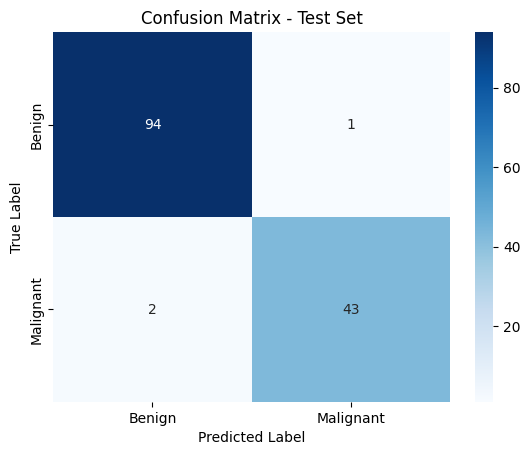

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()
